Anotasi Merupakan label atau penjelasan dari sebuah titik data tertentu yang di atur melalui kordinat

xytext: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)

arrowprops:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. 

Beberapa hal yang bisa diset:
arrowstyle: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.

connectionstyle: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.

color: menentukan warna dari panah

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


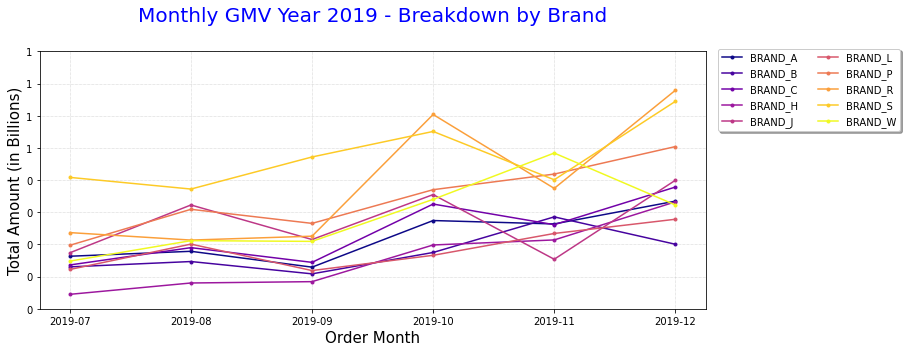

In [8]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))



# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot(marker='.',cmap= 'plasma') # <== CMAP


plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30,fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

#Legend
plt.legend(loc='right', bbox_to_anchor=(1.3,0.85), shadow = True, ncol=2) # <-- legend

#  Menambahkan Top data
top_provinces = (dataset.groupby('province')['gmv'].sum().reset_index().sort_values(by='gmv',ascending=False).head(5))
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000), xytext=(4, 1700000000), weight='bold', color='red', arrowprops=dict(arrowstyle='fancy', connectionstyle="arc3", color='red'))

# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000), xytext=(0, 3700000000), weight='bold', color='red', arrowprops=dict(arrowstyle='->',connectionstyle="angle", color='red'))

plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
print(top_provinces)
plt.show()